<a href="https://colab.research.google.com/github/ABDMSD-007/AAIE_cohort1/blob/main/Week1_Assingnment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #used for working with arrays
import pandas as pd #used for data manipulation and analysis
import zipfile as zf #used for working with zip archives
import urllib.request #used for opening URLs

# Get the data
data_url = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
data_zip, _ = urllib.request.urlretrieve(data_url)

In [3]:
#GRADED ASSIGNMENT
#Point = 1
#function to read data from an archive into a pandas dataframe
def load_data(zipped_data, csv_to_load):
    """This function extracts a csv file from the provided zipped dataset
    and loads it into a pandas dataframe
    zipped_dataset: zip archive of the dataset
    csv_to_load: name of the csv file to extract and load, e.g. 'movies.csv'

    Returns: pandas dataframe

    Hint: use 'open' method of ZipFile followed by 'read_csv' method
    of pandas
    """
    with zf.ZipFile(zipped_data) as z:
        with z.open(csv_to_load) as f:
            df = pd.read_csv(f)
    return df

In [6]:
movie_ratings = load_data(data_zip, 'ml-latest-small/ratings.csv')
# Look at the first 5 records
movie_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
movie_titles = load_data(data_zip, 'ml-latest-small/movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
#GRADED ASSIGNMENT
#Point = 1
#function to merge two dataframes using a common attribute
def merge_data(dataframe1, dataframe2, attribute):
    """This function takes two dataframes as arguments and unites them using
    the supplied attribute
    dataframe1: input dataframe #1
    dataframe2: input dataframe #2
    attribute: column name that exists in both dataframes

    Returns: pandas dataframe

    Hint: use 'merge' method of pandas, making sure that you'll get an
    intersection and not the union
    """
    merged_df = pd.merge(dataframe1, dataframe2, on=attribute, how='inner')
    return merged_df

In [13]:
data = merge_data(movie_ratings, movie_titles, 'movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [14]:
#GRADED ASSIGNMENT
#Points = 3
#function that groups data by attribute1 and calculates per-group statistics for attribute2
def get_stats_per_group(data, attribute1, attribute2, statistic):
    """This function groups the dataframe by attribute1 and then computes the
    supplied statistic for attribute2 within each group
    attribute1: column name that is used to group the data by
    attribute2: column name containing numeric data to compute statistics for
    statistic: name of statistic, should be either 'mean' or 'count'

    Returns: pandas series holding computed statistic per group

    Hint: use 'groupby' method of pandas, followed by 'mean' or 'count' method. Use if/else statement to return mean and count
    """
    grouped_data = data.groupby(attribute1)[attribute2]

    if statistic == 'mean':
        result = grouped_data.mean()
    elif statistic == 'count':
        result = grouped_data.count()
    else:
        raise ValueError("Statistic must be either 'mean' or 'count'")

    return result

In [15]:
ratings_mean = get_stats_per_group(data, 'title', 'rating', 'mean').to_frame('ratings_mean')
ratings_mean.sort_values('ratings_mean', ascending=False).head()

,ratings_mean
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [16]:
ratings_mean = get_stats_per_group(data, 'title', 'rating', 'mean').to_frame('ratings_mean')
ratings_mean.sort_values('ratings_mean', ascending=False).head()

,ratings_mean
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [17]:
ratings_count = get_stats_per_group(data, 'title', 'rating', 'count').to_frame('ratings_count')
ratings_count.sort_values('ratings_count', ascending=False).head()

,ratings_count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


In [18]:
ratings_mean_count = merge_data(ratings_mean, ratings_count, 'title')
ratings_mean_count.head()

,ratings_mean,ratings_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [19]:
# Prepare to plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
plt.style.use('ggplot')

In [20]:
#MANUALLY GRADED ASSIGNMENT
#Point = 1
#function to plot the histogram of the supplied data column
def plot_histogram(df, column, **kwargs):
    """This function takes pandas dataframe and plots the histogram of the
    provided column
    df: pandas dataframe containing the data
    column: name of the column to plot
    **kwargs: optional keyword arguments to pass to the plotting function

    Returns: None

    Hint: use 'histplot' method of seaborn, or 'hist' method of pandas or pyplot
    """
    sns.histplot(df[column], **kwargs)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

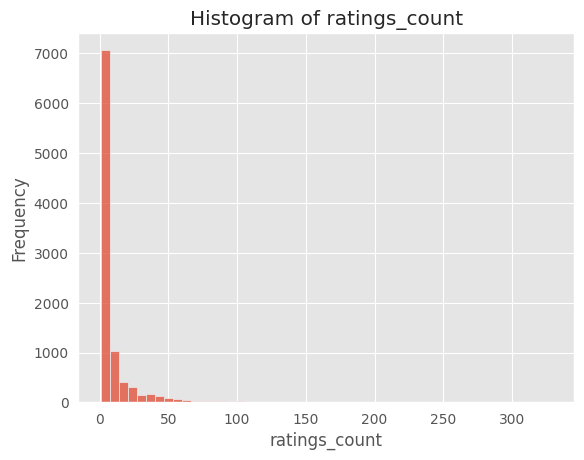

In [21]:
plot_histogram(ratings_mean_count, 'ratings_count', bins=50)

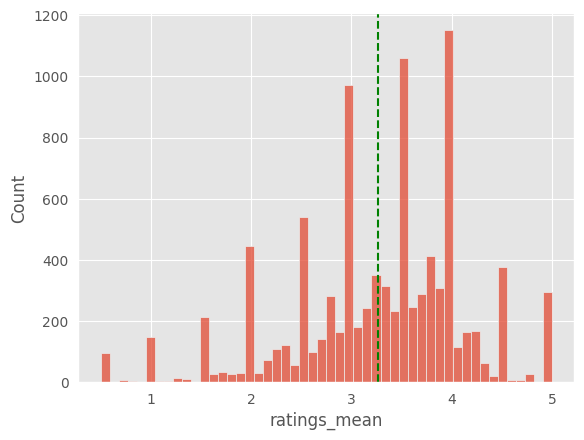

In [28]:
sns.histplot(ratings_mean_count['ratings_mean'], bins=50)
plt.axvline(np.mean(ratings_mean_count['ratings_mean']), color='g', linestyle='--', label='Mean')

In [29]:
#Manually GRADED ASSIGNMENT
#Point = 1
#function to plot the scatterplot of two supplied attributes
def plot2D(df, x_column, y_column, **kwargs):
    """This function takes pandas dataframe containing data and creates
    a scatterplot of x_column vs. y_column
    df: pandas dataframe containing the data
    x_column: name of the column for the x axis
    y_column: name of the column for the y axis
    **kwargs: optional keyword arguments to pass to the plotting function

    Returns: None

    Hint: use 'jointplot' method of seaborn, or 'scatter' method of pyplot, or
    'plot' method of pandas dataframe (with the correct chart type)
    """
    sns.scatterplot(data=df, x=x_column, y=y_column, **kwargs)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatterplot of {x_column} vs. {y_column}')
    plt.show()

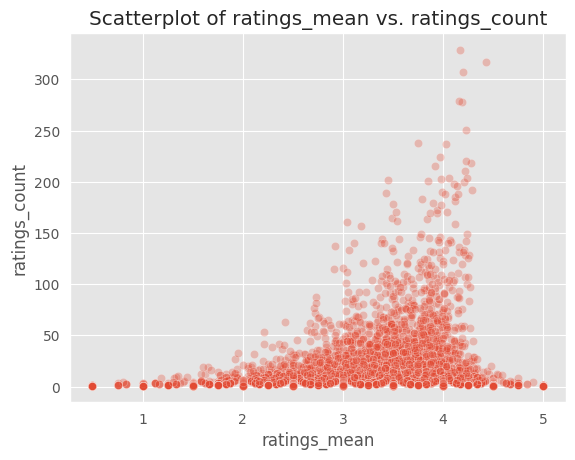

In [30]:
plot2D(ratings_mean_count, 'ratings_mean', 'ratings_count', alpha=0.3)

In [31]:
#GRADED ASSIGNMENT
#Point = 1
#function to filter out the records with lower than minimum number of ratings
def filter_data(df, column, threshold):
    """This function retains only those records whose value for the specified
    column meets the specified threshold.
    df: pandas dataframe containing the data
    column: name of the column to filter the records by

    Returns: filtered dataframe
    """
    filtered_df = df[df[column] >= threshold]
    return filtered_df

In [32]:
ratings_mean_count_filtered = filter_data(ratings_mean_count, 'ratings_count', 100)
ratings_mean_count_filtered.shape[0]

138

In [33]:
#GRADED ASSIGNMENT
#Point = 1
#function that rounds the values of a column to a specified number of decimals
def round_data(df, column, num_decimals):
    """This function rounds the values of a supplied column to a specified
    number of decimal points
    df: pandas dataframe containing the data
    column: name of the column whose values are to be rounded

    Returns: pandas dataframe with rounded values in a specified column
    """
    df[column] = df[column].round(num_decimals)
    return df

In [34]:
ratings_mean_count_filtered = round_data(ratings_mean_count_filtered, 'ratings_mean', 2)
ratings_mean_count_filtered.head()

<ipython-input-33-e64a4379909c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].round(num_decimals)


,ratings_mean,ratings_count
title,,
2001: A Space Odyssey (1968),3.89,109
Ace Ventura: Pet Detective (1994),3.04,161
Aladdin (1992),3.79,183
Alien (1979),3.97,146
Aliens (1986),3.96,126


In [35]:
data_with_counts = merge_data(data, ratings_count, 'title')
data_filtered = filter_data(data_with_counts, 'ratings_count', 50)

In [36]:
#GRADED ASSIGNMENT
#Point = 2
#function that creates a user-movie rating matrix in the form of a pivot table
def create_rating_matrix(df, users_column, movies_column, ratings_column):
    """This function creates a rating matrix, with users as rows and movies as
    columns, which holds the ratings of each user for each movie.
    df: pandas dataframe containing the data
    users_column: name of the column that represents users (i.e. matrix rows)
    movies_column: name of the column that represents movies (i.e. matrix columns)
    ratings_column: name of the column that holds the ratings (i.e. matrix cells)

    Returns: pivot table that represents a user-movie rating matrix

    Hint: use 'pivot_table' method of pandas dataframe
    """
    rating_matrix = df.pivot_table(index=users_column, columns=movies_column, values=ratings_column)
    return rating_matrix

In [37]:
rating_matrix = create_rating_matrix(data_filtered, 'userId', 'title', 'rating')
rating_matrix

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,5.0,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,5.0,NaN,NaN,NaN,3.5,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.5,3.5,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,3.0,3.5,5.0,NaN,4.5,3.0,3.5,2.0,...,3.5,2.5,NaN,4.0,4.0,4.0,NaN,NaN,NaN,3.0


In [38]:
#GRADED ASSIGNMENT
#Point = 3
#function that calculates the sparsity of a matrix
def calculate_sparsity(matrix):
    """This function outputs the sparsity of a given matrix, i.e.
    the proportion of empty cells.
    matrix: user-item matrix in the form of a pivot table

    Returns: sparsity value in range from 0 to 1
    """
    total_cells = matrix.size
    non_empty_cells = matrix.count().sum()
    sparsity = 1 - (non_empty_cells / total_cells)

    return sparsity

In [39]:
print(f'sparsity of rating matrix: {calculate_sparsity(rating_matrix)}')

sparsity of rating matrix: 0.8483314998166483


In [40]:
#GRADED ASSIGNMENT
#Point = 3
#function that computes similarity scores between movie vectors
def compute_similarities(matrix, target_column):
    """This function computes (Pearson) correlation between a vector identified
    by the target_column and all other column vectors of the matrix.
    NOTE: Make sure to exclude the target vector from the results!
    matrix: user-item matrix in the form of a pivot table
    target_column: the name of the target column

    Returns: Pandas series containing similarity scores

    Hint: use 'corrwith' method of Pandas dataframe
    """
    similarities = matrix.corrwith(matrix[target_column])

    similarities = similarities.drop(labels=[target_column])

    return similarities

In [41]:
target_movie = 'Shawshank Redemption, The (1994)'
similar_movies = compute_similarities(rating_matrix, target_movie).to_frame('correlation')
similar_movies.dropna(inplace=True)
similar_movies.sort_values('correlation', ascending=False, inplace=True)
similar_movies.head(10) # top-10 recommendations

,correlation
title,
Rear Window (1954),0.545149
My Cousin Vinny (1992),0.523016
Bad Boys (1995),0.516762
City of God (Cidade de Deus) (2002),0.486670
"Christmas Story, A (1983)",0.475801
"Lock, Stock & Two Smoking Barrels (1998)",0.472598
Lady and the Tramp (1955),0.468373
Grumpier Old Men (1995),0.466380
"Truth About Cats & Dogs, The (1996)",0.462002


In [42]:
rating_matrix = create_rating_matrix(data, 'userId', 'title', 'rating')

In [43]:
#GRADED ASSIGNMENT
#Point = 1
#function that converts a pivot table to a 2D numpy array
def rating_matrix_as_numpy(matrix):
    """This function takes a pivot table and converts it to a 2-dimensional
    numpy array. It also fills NaN values with 0s.
    matrix: user-item matrix in the form of a pivot table

    Returns: a 2D numpy array with missing entries as 0s

    Hint: use 'fillna' and 'to_numpy' methods of pandas dataframe
    """
    matrix_filled = matrix.fillna(0)

    matrix_numpy = matrix_filled.to_numpy()

    return matrix_numpy

In [44]:
R = rating_matrix_as_numpy(rating_matrix)

In [45]:
means = np.mean(R, axis=1)
R_normalized = R - means.reshape(-1, 1)

In [46]:
#GRADED ASSIGNMENT
#Point = 4
#function that re-constructs the matrix using SVD
def perform_SVD(R, k):
    """This function decomposes the input matrix into lower-dimensional
    matrices, based on the value of k. It then constructs the prediction
    matrix by multiplying the low-dimennsional factor matrices together.
    R: user-item matrix in the form of a 2D numpy array

    Returns: re-constructed matrix (as a 2D numpy array)

    Hint: 1. use 'svds' method for decomposition
          2. Convert S to diagonal matrix
          3. 'np.dot' method for matrix - Compute the approximation by matrix multiplication
    multiplication
    """
    # Perform SVD to obtain the factorizations
    from scipy.sparse.linalg import svds
    U, S, VT = svds(R, k=k)

    S_diag = np.diag(S)

    reconstructed_matrix = np.dot(np.dot(U, S_diag), VT)

    return reconstructed_matrix

In [47]:
R_pred = perform_SVD(R_normalized, 20) + means.reshape(-1, 1)

In [48]:
R_pred = perform_SVD(R_normalized, 20) + means.reshape(-1, 1)

predictions = pd.DataFrame(R_pred, index=rating_matrix.index, columns=rating_matrix.columns)
predictions.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.146900,0.003906,0.020632,0.007799,-0.001684,-0.011485,0.797499,-0.027249,-0.251414,0.130325,...,0.004901,0.085609,-0.051707,-0.064003,-0.007106,0.479703,-0.247376,-0.058274,0.950896,0.020495
2,-0.037483,0.005396,0.003100,0.000536,0.000769,0.000926,0.040383,0.003430,0.180114,0.049644,...,0.011375,-0.047892,-0.040742,-0.049628,0.010280,-0.030811,-0.098188,-0.009861,0.163788,-0.000535
3,0.023140,0.008467,0.010169,0.010337,0.009491,0.007393,0.072072,0.001380,-0.022136,0.008833,...,0.005821,0.054022,0.027751,0.025868,0.008882,0.007869,-0.005140,0.016974,0.041348,0.011300
4,-0.014497,0.000061,-0.001169,-0.005346,0.016876,-0.001293,-0.041932,0.003626,0.286305,-0.011484,...,-0.032255,-0.186226,-0.059627,-0.040645,-0.007230,0.523869,-0.154381,-0.081085,0.100361,-0.011963
5,0.014442,-0.000113,-0.001824,-0.004135,0.000982,-0.005518,-0.086516,0.004676,-0.042705,-0.050280,...,-0.003856,0.054744,0.040601,0.033732,-0.001882,-0.067171,-0.046659,0.006401,-0.120529,-0.002456


In [49]:
#GRADED ASSIGNMENT
#Point = 1
#function that computes the number of ratings that have already been given by the user
def get_num_ratings(movie_ratings, userId):
    """This function returns the number of movies that the user has rated.
    movie_ratings: pandas dataframe holding movie ratings
    userId: user identifier

    Returns: count of movies that have been rated by the user

    """
    num_ratings = movie_ratings[movie_ratings['userId'] == userId].shape[0]

    return num_ratings

In [50]:
target_user = 1
# Display the number of known ratings for the target user
num_ratings_user = get_num_ratings(movie_ratings, target_user)
print(f"User {target_user} has rated {num_ratings_user} movies.")

User 1 has rated 232 movies.


In [51]:
# Print top-10 movies rated by the target user
movies_user = data[data.userId == target_user]
movies_user = movies_user.drop(columns=['userId', 'movieId', 'timestamp'])
movies_user.sort_values("rating", ascending=False).head(10)

,rating,title,genres
16250,5.0,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War
14053,5.0,Excalibur (1981),Adventure|Fantasy
9066,5.0,Indiana Jones and the Last Crusade (1989),Action|Adventure
9206,5.0,Pink Floyd: The Wall (1982),Drama|Musical
14254,5.0,From Russia with Love (1963),Action|Adventure|Thriller
14201,5.0,Goldfinger (1964),Action|Adventure|Thriller
14169,5.0,"Dirty Dozen, The (1967)",Action|Drama|War
14078,5.0,Gulliver's Travels (1939),Adventure|Animation|Children
13849,5.0,American Beauty (1999),Drama|Romance
13497,5.0,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy|Musical


In [52]:
#GRADED ASSIGNMENT
#Point = 1
#function that extracts the user vector of predictions, with known movies removed.
def get_user_predictions(prediction_matrix, userId):
    """This function reduces the prediction matrix to the user vector identified
    by the supplied userId, and removes all entries for which the user has
    already provided ratings (marked as NaN)
    prediction_matrix: pandas dataframe holding predictions
    userId: user identifier

    Returns: user vector of (filtered) predictions as pandas dataframe

    Hint: use 'dropna' method of Pandas dataframe to remove known ratings
    """
    user_vector = prediction_matrix.loc[userId]

    user_vector_filtered = user_vector.dropna()

    return user_vector_filtered

In [53]:
# # Mark all known ratings in our predictions as NaN
# predictions = predictions[rating_matrix.isna()]

# # Create a dataframe holding the vector of predicted ratings for the target user
# predictions_user = get_user_predictions(predictions, target_user)
# predictions_user = predictions_user.unstack().to_frame('predicted_rating')

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [55]:
# Mark all known ratings in our predictions as NaN
predictions = predictions[rating_matrix.isna()]

# Create a dataframe holding the vector of predicted ratings for the target user
predictions_user = get_user_predictions(predictions, target_user)
# Convert the Series to a DataFrame with the specified column name
predictions_user = predictions_user.to_frame('predicted_rating')

In [54]:
# predictions_user = merge_data(predictions_user, movie_titles, 'title')
# predictions_user = predictions_user[['predicted_rating', 'title', 'genres']]
# predictions_user.sort_values('predicted_rating', ascending=False).head(10)

KeyError: "['predicted_rating'] not in index"

In [56]:
predictions_user = merge_data(predictions_user, movie_titles, 'title')
# Check the columns of predictions_user after the merge
print(predictions_user.columns)
predictions_user = predictions_user[['predicted_rating', 'title', 'genres']] # Adjust column names if needed based on the output above
predictions_user.sort_values('predicted_rating', ascending=False).head(10)

Index(['title', 'predicted_rating', 'movieId', 'genres'], dtype='object')


,predicted_rating,title,genres
8167,3.922611,Terminator 2: Judgment Day (1991),Action|Sci-Fi
327,3.703282,Aliens (1986),Action|Adventure|Horror|Sci-Fi
7556,3.367953,"Sixth Sense, The (1999)",Drama|Horror|Mystery
1314,3.277058,"Breakfast Club, The (1985)",Comedy|Drama
2350,3.185397,Die Hard (1988),Action|Crime|Thriller
7792,3.033011,Stand by Me (1986),Adventure|Drama
2937,2.985074,Ferris Bueller's Day Off (1986),Comedy
3424,2.934863,"Godfather, The (1972)",Crime|Drama
4431,2.882670,Jaws (1975),Action|Horror
8772,2.741384,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
